In [1]:
from StochasticProcesses import *
import scipy.stats as sp
from functools import partial

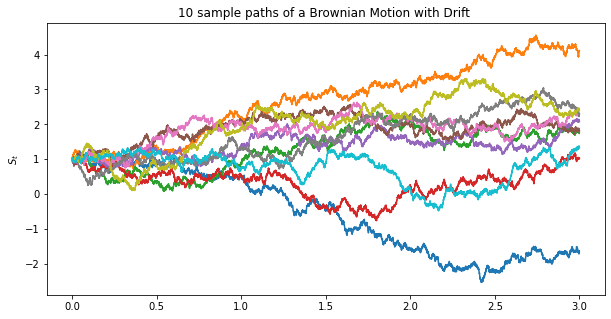

In [2]:
bm = BrownianMotionWithDrift(T=3, x0=1, mu=0.5, sigma=0.8)
bm.plotPaths(nPaths=10)

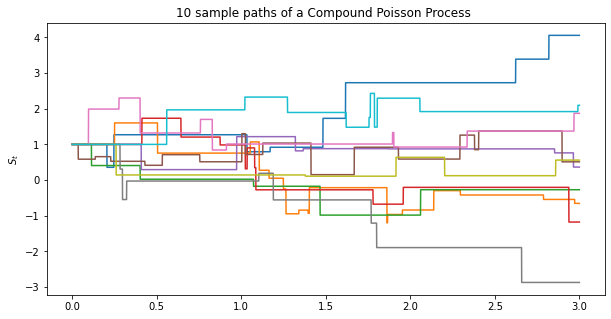

In [3]:
cp = CompoundPoissonProcess(lam=3, T=3, x0=1, jumpSizeRV=sp.uniform(loc=-1, scale=2))
cp.plotPaths(nPaths=10)

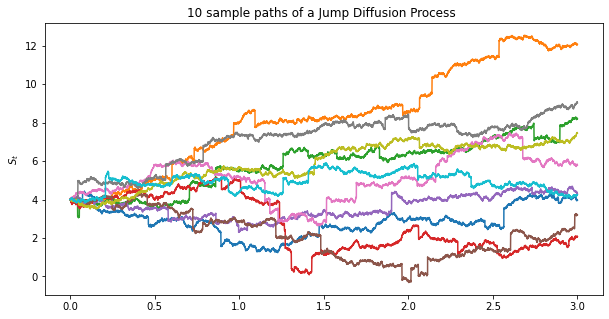

In [4]:
jd = JumpDiffusionProcess(bm, cp, x0=2)
jd.plotPaths(nPaths=10)

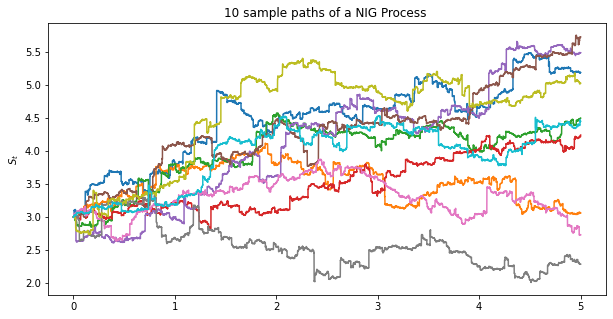

In [5]:
nig = NIGProcess(T=5, x0=3, nSteps=20000, theta=0.3, sigma=0.5, kappa=0.2)
nig.plotPaths(nPaths=10)

In [6]:
from OptionPricing import AssetModel

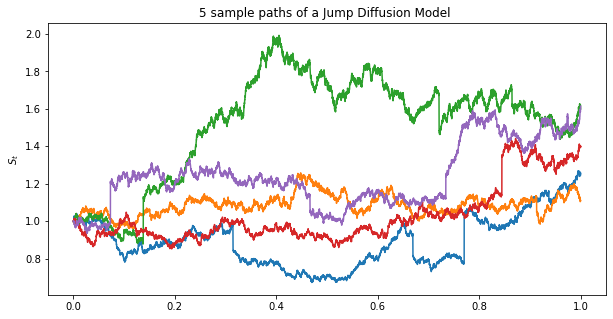

In [7]:
r = 0.3
sig = 0.3
lam = 3
jumpScale = 0.15
jumpRV = sp.norm(scale=jumpScale)
expMomJump = np.exp(jumpScale ** 2 / 2)
drift = r - sig **2 / 2 + lam * (1 - expMomJump)
jd = JumpDiffusionProcess(BrownianMotionWithDrift(mu=drift, sigma=sig), CompoundPoissonProcess(lam=lam, jumpSizeRV=jumpRV))
asset = AssetModel(jd, r=0.)
asset.plotPaths(nPaths=5)

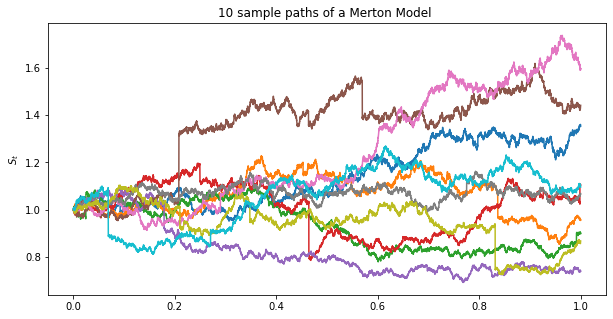

In [8]:
from OptionPricing import *
merton = MertonModel(r=0.1)
merton.plotPaths(nPaths=10)

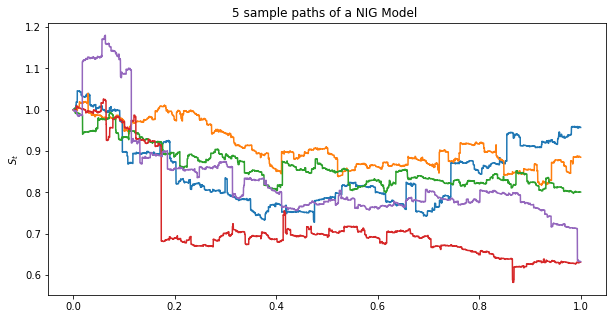

In [9]:
nig = NIGModel()
nig.plotPaths(nPaths=5)

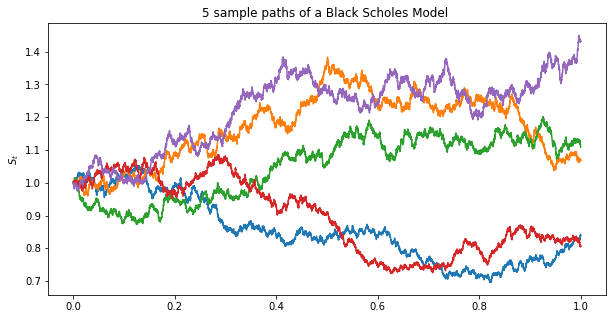

In [10]:
bs = BlackScholesModel()
bs.plotPaths(nPaths=5)

In [11]:
n = 1e6
print('Martingale Check (Difference to expected value)')
for model in [bs, merton, nig]:
    print('{}: {:.6f}'.format(model.name, model.generateValues(nVals=int(n)).mean() - np.exp(model.r)))

Martingale Check (Difference to expected value)
Black Scholes Model: 0.000147
Merton Model: -0.000278
NIG Model: 0.000255


In [12]:
k = 2
call = lambda x: np.maximum(x - k, 0)
for model in [bs, merton, nig]:
    print('{}: {:.6f}'.format(model.name, model.OptionPriceMC(call, 3)))

Black Scholes Model: 1.098835
Merton Model: 1.197827
NIG Model: 1.117681


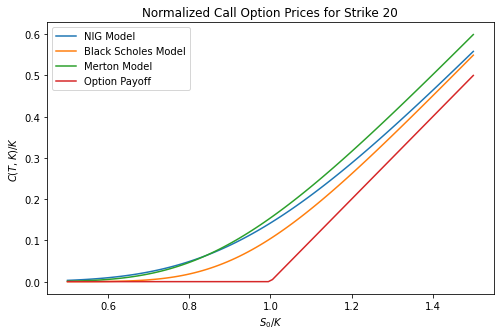

In [15]:
k = 20
call = lambda x: np.maximum(x - k, 0)
s = np.linspace(10, 30, 100)
plt.figure(figsize=(8, 5))
for model in [nig, bs, merton]:
    prices = model.OptionPriceRangeMC(call, s)
    plt.plot(s/k, prices/k, label=model.name)
plt.plot(s/k, call(s)/k, label='Option Payoff')
plt.xlabel('$S_0/K$')
plt.ylabel('$C(T,K)/K$')
plt.title('Normalized Call Option Prices for Strike {}'.format(k))
plt.legend()
plt.show()

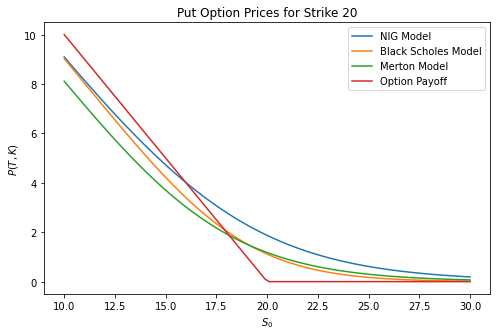

In [17]:
k = 20
put = lambda x: np.maximum(k - x, 0)
s = np.linspace(10, 30, 100)
plt.figure(figsize=(8, 5))
for model in [nig, bs, merton]:
    prices = model.OptionPriceRangeMC(put, s)
    plt.plot(s, prices, label=model.name)
plt.plot(s, put(s), label='Option Payoff')
plt.xlabel('$S_0$')
plt.ylabel('$P(T,K)$')
plt.title('Put Option Prices for Strike {}'.format(k))
plt.legend()
plt.show()

In [18]:
from AnalyticFormulas import blackScholesPrice

In [19]:
s = 25
k = 20
bs.OptionPriceMC(call, s, nSim=1000000) - blackScholesPrice(s, bs.r, bs.logPriceProcess.sigma, bs.T, k)

0.008146746119786386

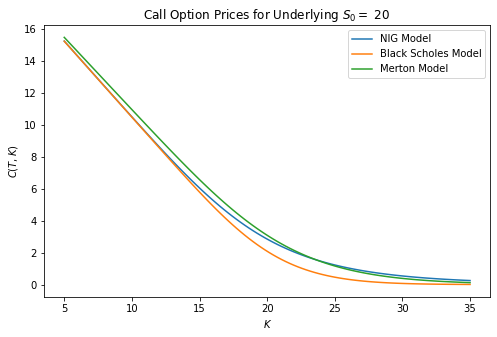

In [20]:
s = 20
strikes = np.linspace(5, 35, 100)
def call(x, strike): return np.maximum(x - strike, 0)
calls = [partial(call, strike=k) for k in strikes]
plt.figure(figsize=(8, 5))
for model in [nig, bs, merton]:
    prices = model.OptionPricePayOffRangeMC(calls, s)
    plt.plot(strikes, prices, label=model.name)
plt.xlabel('$K$')
plt.ylabel('$C(T,K)$')
plt.title('Call Option Prices for Underlying $S_0=$ {}'.format(s))
plt.legend()
plt.show()

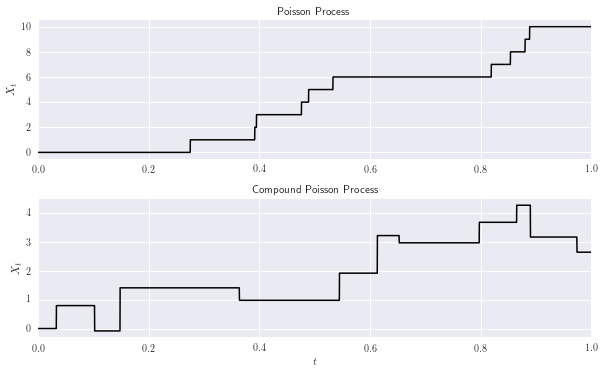

In [22]:
plt.rc('text', usetex=True)
#plt.rc('font', family='Fira Math')
plt.style.use('seaborn')

poi = PoissonProcess(lam=10, T=1, x0=0)
cp = CompoundPoissonProcess(lam=10, T=1, x0=0, jumpSizeRV=sp.norm(loc=0, scale=1.))
fig, axes = plt.subplots(2, 1, figsize=(8.5, 5.3))
fig.tight_layout()
for ax, paths in zip(axes, [poi.generatePaths(), cp.generatePaths()]):
    ax.margins(x=0)
    ax.set_ylabel('$X_t$')
    ax.plot(paths, c='black', lw=1.5)
axes[0].set_title('Poisson Process', fontsize=11)
axes[1].set_title('Compound Poisson Process', fontsize=11)
axes[1].set_xlabel('$t$')
plt.tight_layout()
#plt.savefig('C:\\Users\\oli-w\\OneDrive\\Uni\\Master Thesis\\Presentation\\Slides\\PoissonPaths.pdf', facecolor='white')

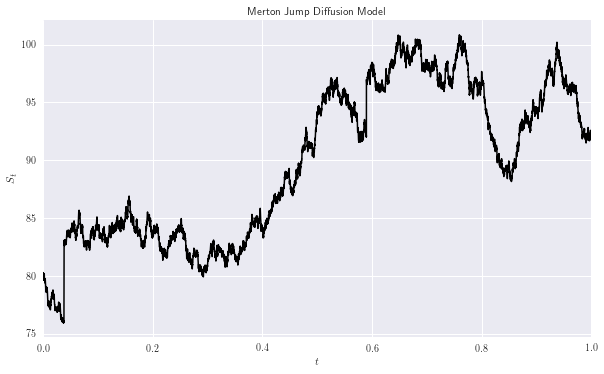

In [23]:
merton = MertonModel(lam=2, sig_j=0.1, sigma=0.15, s0=80, r=0.07)
fig, ax = plt.subplots(figsize=(8.5, 5.3))
fig.tight_layout()
ax.margins(x=0)
ax.set_ylabel('$S_t$')
ax.set_xlabel('$t$')
ax.plot(merton.generatePaths(), c='black', lw=1.5)
ax.set_title('Merton Jump Diffusion Model', fontsize=11)
plt.tight_layout()
plt.savefig('C:\\Users\\oli-w\\OneDrive\\Uni\\Master Thesis\\Presentation\\Slides\\MertonPath.pdf', facecolor='white')
